In [1]:
# загрузка необходимых библиотек
# для осуществления операций с массивом данных
import pandas as pd
# для математических и статистических вычислений
import numpy as np
from scipy import stats as st
# для графического анализа данных
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# установим стили построения диаграмм
sns.set_style('darkgrid')
plt.style.use('ggplot')

### Шаг 1. Откройте файл с данными и изучите общую информацию

Постановка задачи на данном шаге исследования:

(а) Открыть файлы с данными;

(б) Изучить общую информацию, которая содержится в массивах данных.


Загрузим массивы данных, опишем переменные.

In [3]:
# информация о пользователях
users = pd.read_csv('users.csv')

In [4]:
# вывод первых 5-ти абонентов сети "Мегалайн"
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [5]:
# осуществим подсчет количества абонентов в зависимости от тарифа
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

У значительной части абонентов (351 абонент) подключен тариф "Смарт". У 149-ти абонентов - тариф "Ультра".

In [6]:
# вывод общего описания информации о пользователях
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В общей сложности имеем 500 наблюдений (клиентов "Мегалайн").

В таблице с информацией о пользователях имеем следующие переменные (здесь и далее, в скобках указан тип переменных):
- user_id — уникальный идентификатор пользователя (целочисленный формат)
- first_name — имя пользователя (текстовый формат)
- last_name — фамилия пользователя (текстовый формат)
- age — возраст пользователя в годах (целочисленный формат)
- reg_date — дата подключения тарифа, а именно день, месяц, год (текстовый формат)
- churn_date — дата прекращения пользования тарифом: если значение пропущено, то тариф ещё действовал на момент выгрузки данных (текстовый формат)
- city — город проживания пользователя (текстовый формат)
- tariff — название тарифного плана (текстовый формат)

Стоит преобразовать текстовый формат даты подключения тарифа reg_date и даты прекращения пользования тарифом churn_date в формат времени datetime.

Имеем 462 пропущенных наблюдения в дате подключения тарифа churn_date.

In [7]:
# Информация о звонках
calls = pd.read_csv('calls.csv')

In [8]:
# вывод общего описания информации о звонках
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблицей с информацией о звонках имеем следующие переменные:
- id — уникальный номер звонка (текстовый формат)
- call_date — дата звонка (текстовый формат)
- duration — длительность звонка в минутах (формат с плавающей точкой)
- user_id — идентификатор пользователя, сделавшего звонок (целочисленный формат).

Стоит преобразовать текстовый формат переменной дата звонка call_date в формат даты datetime.

В данном случае, пропущенных наблюдений не имеем.

In [9]:
# информация об интернет-сессиях
internet = pd.read_csv('internet.csv')

In [10]:
# вывод общего описания информации об интернет-сессиях
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице с информацией об интернет-сессиях имеем следующие переменные:
- id — уникальный номер сессии (текстовый формат)
- mb_used — объём потраченного за сессию интернет-трафика в мегабайтах (формат с плавающей точкой)
- session_date — дата интернет-сессии (текстовый формат)
- user_id — идентификатор пользователя (целочисленный формат).

Стоит преобразовать текстовый формат даты интернет-сессии session_date в формат даты datetime.

In [11]:
# информация о сообщениях
messages = pd.read_csv('messages.csv')

In [12]:
# вывод общего описания информации о сообщениях
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице с информацией о сообщениях имеем следующие переменные:
- id — уникальный номер сообщения (текстовый формат)
- message_date — дата сообщения (текстовый формат)
- user_id — идентификатор пользователя, отправившего сообщение (целочисленный формат).

Стоит преобразовать текстовый формат даты сообщения message_date в формат даты datetime.

In [13]:
# информация о тарифах
tariffs = pd.read_csv('tariffs.csv')

In [14]:
# вывод общего описания информации о тарифах
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице с информацией о тарифах имеем следующие переменные:
- tariff_name — название тарифа (текстовый формат)
- rub_monthly_fee — ежемесячная абонентская плата в рублях (целочисленный формат)
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату (целочисленный формат)
- messages_included — количество сообщений в месяц, включённых в абонентскую плату (целочисленный формат)
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату в мегабайтах (целочисленный формат)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета: например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата (целочисленный формат)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета (целочисленный формат)
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета: 1 гигабайт = 1024 мегабайта (целочисленный формат)

### Промежуточные выводы 1-го шага исследования:

- имеем 500 наблюдений: пользователи сети "Мегалайн": 351 абонент с тарифом "Смарт", 149 абонент - тариф "Ультра"
- имеем три дополнительных массива данных, содержащие информацию в отношении (1) звонков и минут переговоров, (2) сообщений, (3) интернет-трафика.
- имеем 462 пропущенных наблюдения в дате подключения тарифа churn_date.
- такие переменные как дата (а) подлючения тарифа, (б) прекращения пользования тарифом, (в) интернет-сессии, (в) звонка, (г) сообщения носят текстовый формат object, который (формат) следует преобразовать в формат даты datetime.

### Шаг 2. Подготовьте данные

Постановка задачи на данном шаге:\
(а) Приведите данные к нужным типам.\
(б) Найдите и исправьте ошибки в данных. Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что у большого количества звонков длительность — 0.0 минут. Это проблема в данных, нужна предобработка.\
(в) Посчитайте для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


#### Приведем данные к нужным типам.

Ранее, было выявлено наличие 462 пропущенных наблюдения по переменной дата прекращения пользования тарифом churn_date. Для замены подобных пропущенных наблюдений определим дату на момент выгрузки массива данных на основе даты последнего звонка, сообщения и последней интернет-сессии.

In [15]:
# осуществим сортировку по дате последнего звонка в убывающем порядке, и выведем первое наблюдение
calls['call_date'].sort_values(ascending=False).head(1)

131114    2018-12-31
Name: call_date, dtype: object

In [16]:
# осуществим сортировку по дате последнего сообщения в убывающем порядке и выведем первое наблюдение
messages['message_date'].sort_values(ascending=False).head(1)

98381    2018-12-31
Name: message_date, dtype: object

In [17]:
# осуществим сортировку по дате последней интернет сессии и выведем первое наблюдение
internet['session_date'].sort_values(ascending=False).head(1)

101144    2018-12-31
Name: session_date, dtype: object

Таким образом, момент выгрузки массива данных датируется 31 декабря 2018 года.

In [18]:
# заполним пропущенные наблюдения по дате прекращения пользования тарифом churn_date
# датой на момент выгрузки данных (31-12-2018)
try:
    users['churn_date'] = users['churn_date'].transform(lambda x: x.fillna(value='2018-12-31'), axis=0)
    print('Заполнение пропущенных наблюдений по дате прекращения пользования тарифом успешно выполнено')
except:
    print('Возникла ошибка, стоит изменить способ замены')

Заполнение пропущенных наблюдений по дате прекращения пользования тарифом успешно выполнено


In [19]:
# вывод информации по первым 5-ти клиентам для определения формата дат
users[['reg_date','churn_date']].head()

,reg_date,churn_date
0,2018-05-25,2018-12-31
1,2018-11-01,2018-12-31
2,2018-06-17,2018-12-31
3,2018-08-17,2018-12-31
4,2018-05-14,2018-12-31


Видим, что даты стоит преобразовать в формат **год-месяц-день**.

In [20]:
# осуществим преобразование формат переменных:
# дата подключения тарифа
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
# дата прекращения пользования тарифом
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y-%m-%d')
# дата звонка
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
# дата интернет-сессии
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
# дата сообщения
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [21]:
# преобразуем текстовый формат идентификатора звонка, интернет-сессии, сообщения в целочисленный формат
for database in [calls, internet, messages]:
    database['id'] = database['id'].astype('int')

#### Найдем и исправим ошибки в данных.

[Text(0.5, 1.0, 'Потребление интернета')]

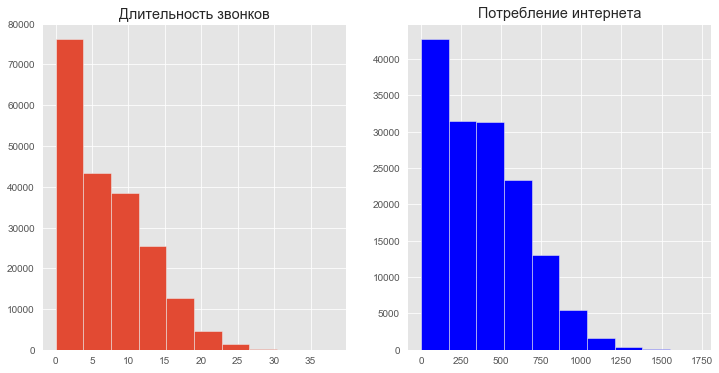

In [22]:
# определим два подграфика, увеличим размер диаграмм
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
# построим гистограмму распределения длительности звонков
calls['duration'].hist(ax=axes[0]).set(title='Длительность звонков')
# построим гистограмму распределения потребления интернета
internet['mb_used'].hist(ax=axes[1],color='blue').set(title='Потребление интернета')

Видим наличие нулевых величин (а) длительности звонков, (б) объема потребляемого интернет-трафика.

[Text(0.5, 1.0, 'Потребление интернета')]

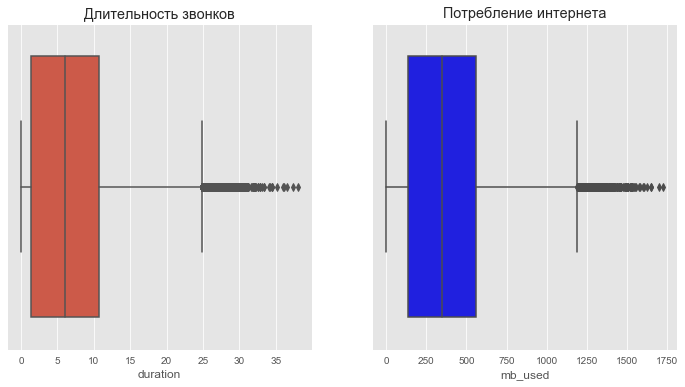

In [23]:
# аналогично, определим два подграфика, увеличим размер диаграмм
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
# построим коробчатую диаграмму длительности звонков
sns.boxplot(x='duration', data=calls, ax=axes[0]).set(title='Длительность звонков')
# построим коробчатую диаграмму потребления интернета
sns.boxplot(x='mb_used', data=internet, color='blue', ax=axes[1]).set(title='Потребление интернета')

*Статистически* выбивающимися являются величины (а) длительности звонков, превышающих 25 минут, (б) объемов потребляемого интернет-трафика, превышающих 1200 мб.

Подобные *статистически* выбивающиеся величины весьма оправданы, так как пользователь может (а) переговаривать с близкими людьми, обсуждать деловые вопросы, которые требуют большего времени, (б) скачивать большие файлы наподобие фильмов.

Воспользуемся следующей подсказкой: *«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута*.

Тем самым, длительность звонка **duration**, объём потраченного интернет-трафика **mb_used**, которые указаны как нулевые значения, заменим на единицу.

In [24]:
# замена (на месте) нулевых значений переменной длительность звонка duration на единицу
calls['duration'].replace(0,1, inplace=True)

In [25]:
# замена (на месте) нулевых значений переменной объем потраченного интернет-трафика на единицу
internet['mb_used'].replace(0,1, inplace=True)

#### Подсчитаем дополнительные переменные.

#### *Количество сделанных звонков и израсходованных минут разговора по месяцам*

In [26]:
# определим столбец month, значения которого отражают месяц осуществления звонка
calls['month'] = calls['call_date'].dt.month

In [27]:
# Далее, определим сводную таблицу,
# индексы которой отражают месяц
# с последующим вычислением количества звонков count и суммы потраченных минут sum
pivot_users_calls = calls.pivot_table(index=['user_id','month'],
                                      values='duration',
                                      aggfunc=['count','sum']) 

In [28]:
# отображение сводной таблицы количества звонков и минут разговора пользователя в разрезе месяцев
# первые 5 наблюдений
pivot_users_calls.head()

count      sum
              duration duration
user_id month                  
1000    5           22   155.06
        6           43   173.90
        7           47   324.80
        8           52   399.87
        9           58   452.14

In [29]:
# переименовываем столбцы сводной таблицы количества звонков calls_amount и минут разговора calls_duration абонента
pivot_users_calls.columns = ['calls_amount','calls_duration']

In [30]:
# определим размерность сводной таблицы количества звонков, длительности телефоннных разговоров
pivot_users_calls.shape

(3174, 2)

#### *Количество отправленных сообщений по месяцам*

In [31]:
# определим столбец month, значения которого отображают месяц отправления сообщения
messages['month'] = messages['message_date'].dt.month

In [32]:
# определим сводную таблицу, 
# индексы которой отображают месяц
# с вычислением количества отправленных сообщений
pivot_users_messages =  messages.pivot_table(index=['user_id','month'],
                                             values='message_date',
                                             aggfunc='count')

In [33]:
# отображение сводной таблицы количества сообщений каждого пользователя в разрезе месяцев
# первые 5 наблюдений
pivot_users_messages.head()

message_date
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57

In [34]:
# переименовываем столбец сводной таблицы количества сообщений messages_amount
pivot_users_messages.columns = ['messages_amount']

In [35]:
# определим размерность сводной таблицы количества отправленных сообщений
pivot_users_messages.shape

(2717, 1)

#### *Объем израсходованного интернет-трафика по месяцам*

In [36]:
# определим столбец month, значения которого отображают месяц использования интернет-трафика
internet['month'] = internet['session_date'].dt.month

In [37]:
# построим сводную таблицу,
# индексы которой отображают месяц использования интернета
# с вычислением общей суммы израсходованного интернет-трафика 
pivot_users_internet = internet.pivot_table(index=['user_id','month'], 
                                            values='mb_used',
                                            aggfunc=['sum']) 

In [38]:
# отображение сводной таблицы использования интернета пользователем в разрезе месяцев
# первые 5 наблюдений
pivot_users_internet.head()

sum
                mb_used
user_id month          
1000    5       2254.49
        6      23238.77
        7      14004.64
        8      14057.93
        9      14570.91

In [39]:
# переименовываем столбец сводной таблицы использования интернета в sum_mb_used
pivot_users_internet.columns = ['sum_mb_used']

In [40]:
# определим размерность сводной таблицы использованного интернет-трафика
pivot_users_internet.shape

(3203, 1)

#### *Помесячная выручка с каждого пользователя:*

Соединим сводные таблицы с друг другом и с массивом данных общей информации абонентов users. Начнем со сводной таблицы с большей размерности для сохранения большего количества наблюдений.

In [41]:
# при соединении таблиц также воспользуемся исключениями
try:
    users_data = (
        # здесь и далее, в сводных таблицах переводим индексы в столбцы
        pivot_users_internet.reset_index() 
        # соединяем сводную таблицу использования интернета со сводной таблицей звонков по следующим переменным:
        # идентификатор абонента user_id, месяц использования услуги month
        .merge(pivot_users_calls.reset_index(), on=['user_id','month'])
        # соединяем предыдущую сводную таблицу со сводной таблицей сообщений
        .merge(pivot_users_messages.reset_index(), on=['user_id','month'])
        # соединяем предыдущую сводную таблицу с таблицей общей информации абонентов
        .merge(users, on='user_id') #
    )
    print('Соединение таблиц выполнено успешно, итоговая таблица user_data готова')
except:
    print('При соединении таблиц возникла ошибка')

Соединение таблиц выполнено успешно, итоговая таблица user_data готова


In [42]:
# определим столбец gb_used, отражающие кол-во израсходованного интернет-трафика в Гб
users_data['gb_used'] = users_data['sum_mb_used'] / 1024

In [43]:
# вывод первых 5-ти абонентов из итоговой таблицы users_data
users_data.head()

,user_id,month,sum_mb_used,calls_amount,calls_duration,messages_amount,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used
0,1000,5,2254.49,22,155.06,22,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2.201650
1,1000,6,23238.77,43,173.90,60,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,22.694111
2,1000,7,14004.64,47,324.80,75,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,13.676406
3,1000,8,14057.93,52,399.87,81,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,13.728447
4,1000,9,14570.91,58,452.14,57,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.229404


Для подсчета выручки определим следующие функции:

In [44]:
# функция определения выручки от количества минут, израсходованных сверх бесплатного лимита
def excess_calls_revenue(data):
    
    # выделям столбец, отражащий тип подключенного тарифа
    tariff = data['tariff']
    # определяем фактическое количество проговоренных минут
    actual_calls = data['calls_duration']
    # определяем бесплатный лимит количества минут в рамках тарифа "Смарт"
    smart_free_calls = 500 
    # определяем бесплатный лимит количества минут в рамках тарифа "Ультра"
    ultra_free_calls = 3000
    
    # вычисляем выручку от количества минут, проговоренных сверх бесплатного лимита в случае тарифа "Смарт"
    if tariff == 'smart':
        # если количество фактических минут не превышает бесплатный лимит, то
        if (actual_calls - smart_free_calls) < 0:
            # дополнительную прибыль и не получаем
            excess_calls_revenue = 0
        # если количество проговоренных минут превышает бесплатный лимит, то
        else:
            # количество минут, превышающих бесплатный лимит умножаем на стоимость минуты сверх бесплатного лимита
            excess_calls_revenue = (actual_calls - smart_free_calls) * 3
        # возвращаем выручку от количества проговоренных минут, превышающих бесплатный лимит
        return excess_calls_revenue
    
    # вычисляем выручку от количества минут, проговоренных сверх бесплатного лимита в случае тарифа "Ультра"
    else:
        # если количество фактических минут не превышает бесплатный лимит, то
        if (actual_calls - ultra_free_calls) < 0:
            # дополнительную прибыль и не получаем
            excess_calls_revenue = 0
        # если количество проговоренных минут превышает бесплатный лимит, то
        else:
            # количество минут, превышающих бесплатный лимит умножаем на стоимость минуты сверх бесплатного лимита
            excess_calls_revenue = (actual_calls - ultra_free_calls) * 1
        # возвращаем выручку от количества проговоренных минут, превышающих бесплатный лимит
        return excess_calls_revenue

In [45]:
# функция определения выручки от количества сообщений, израсходованных сверх бесплатного лимита
def excess_messages_revenue(data):
    
    # выделям столбец, отражащий тип подключенного тарифа
    tariff = data['tariff']
    # определяем фактическое количество отправленных сообщений
    actual_messages = data['messages_amount']
    # определяем бесплатный лимит количества сообщений в рамках тарифа "Смарт"
    smart_free_messages = 50
    # определяем бесплатный лимит количества сообщений в рамках тарифа "Ультра"
    ultra_free_messages = 1000
    
    # вычисляем выручку от количества сообщений, израсходованных сверх бесплатного лимита в случае тарифа "Смарт"
    if tariff == 'smart':
        # если количество фактических сообщений не превышает бесплатный лимит, то
        if (actual_messages - smart_free_messages) < 0:
            # дополнительную прибыль и не получаем
            excess_messages_revenue = 0
        # если количество израсходованных сообщений превышает бесплатный лимит, то
        else:
            # кол-во сообщений, превышающих бесплатный лимит умножаем на ст-ть сообщений сверх бесплатного лимита
            excess_messages_revenue = (actual_messages - smart_free_messages) * 3
        # возвращаем выручку от количества израсходованных сообщений, превышающих бесплатный лимит
        return excess_messages_revenue
    
    # вычисляем выручку от количества сообщений, израсходованных сверх бесплатного лимита в случае тарифа "Ультра"
    else:
        # если количество фактических сообщений не превышает бесплатный лимит, то
        if (actual_messages - ultra_free_messages) < 0:
            # дополнительную прибыль и не получаем
            excess_messages_revenue = 0
        # если количество фактических сообщений превышает бесплатный лимит, то
        else:
            # кол-во сообщений, превышающих бесплатный лимит умножаем на ст-ть сообщений сверх бесплатного лимита
            excess_messages_revenue = (actual_messages - ultra_free_messages) * 1
        # возвращаем выручку от количества израсходованных сообщений, превышающих бесплатный лимит
        return excess_messages_revenue

In [46]:
# функция определения выручки от количества интернета, израсходованного сверх бесплатного лимита
def excess_internet_revenue(data):
    
    # выделям столбец, отражащий тип подключенного тарифа
    tariff = data['tariff']
    # определяем фактическое количество израсходованного интернета
    actual_internet = data['gb_used']
    # определяем бесплатный лимит количества интернета в рамках тарифа "Смарт"
    smart_free_internet = 15
    # определяем бесплатный лимит количества интернета в рамках тарифа "Ультра"
    ultra_free_internet = 30
    
    # вычисляем выручку от количества интернета, израсходованного сверх бесплатного лимита в случае тарифа "Смарт"
    if tariff == 'smart':
        # если количество фактического интернета не превышает бесплатный лимит, то
        if (actual_internet - smart_free_internet) < 0:
            # дополнительную прибыль и не получаем
            excess_internet_revenue = 0
        # если количество израсходованного интернета превышает бесплатный лимит, то
        else:
            # кол-во интернета, превышающего бесплатный лимит умножаем на ст-ть интернета сверх бесплатного лимита
            excess_internet_revenue = (actual_internet - smart_free_internet) * 200
        # возвращаем выручку от количества израсходованного интернета, превышающего бесплатный лимит
        return excess_internet_revenue
    
    # вычисляем выручку от количества интернета, израсходованного сверх бесплатного лимита в случае тарифа "Ультра"
    else:
        # если количество фактического интернета не превышает бесплатный лимит, то
        if (actual_internet - ultra_free_internet) < 0:
            # дополнительную прибыль и не получаем
            excess_internet_revenue = 0
        # если количество фактического интернета превышает бесплатный лимит, то
        else:
            # кол-во интернета, превышающего бесплатный лимит умножаем на ст-ть интернета сверх бесплатного лимита
            excess_internet_revenue = (actual_internet - ultra_free_internet) * 150
        # возвращаем выручку от количества израсходованного интернета, превышающего бесплатный лимит
        return excess_internet_revenue

In [47]:
# при применении функции excess_call_revenue воспользуемся исключениями
try:
    # определим столбец excess_calls_revenue,
    # отражающий выручку от израсходованных минут, превышающих бесплатный лимит
    users_data['excess_calls_revenue'] = users_data.apply(excess_calls_revenue, axis=1)
    print('Вычисление выручки от израсходованных минут, превышающих бесплатный лимит выполнено успешно')
except:
    print('При вычислении выручки от израсходованных минут, превышающих бесплатный лимит возникла ошибка')

Вычисление выручки от израсходованных минут, превышающих бесплатный лимит выполнено успешно


In [48]:
try:
    # определим столбец excess_internet_revenue,
    # отражающий выручку от израсходованного интернета, превышающего бесплатный лимит
    users_data['excess_internet_revenue'] = users_data.apply(excess_internet_revenue, axis=1)
    print('Вычисление выручки от израсходованного интернета, превышающего бесплатный лимит выполнено успешно')
except:
    print('При вычислении выручки от израсходованного интернета, превышающего бесплатный лимит возникла ошибка')

Вычисление выручки от израсходованного интернета, превышающего бесплатный лимит выполнено успешно


In [49]:
try:
    # определим столбец excess_messages_revenue,
    # отражающий выручку от израсходованных сообщений, превышающих бесплатный лимит
    users_data['excess_messages_revenue'] = users_data.apply(excess_messages_revenue, axis=1)
    print('Вычисление выручки от израсходованных сообщений, превышающих бесплатный лимит выполнено успешно')
except:
    print('При вычислении выручки от израсходованных сообщений, превышающих бесплатный лимит возникла ошибка')

Вычисление выручки от израсходованных сообщений, превышающих бесплатный лимит выполнено успешно


In [50]:
# функция определения совокупной ежемесячной выручки от абонентов
def revenue(data):
    # выделяем столбец, отражающий выручку от израсходованных минут, превышающих бесплатный лимит
    excess_calls_revenue = data['excess_calls_revenue']
    # выделяем столбец, отражающий выручку от израсходованных сообщений, превышающих бесплатный лимит
    excess_messages_revenue = data['excess_messages_revenue']
    # выделяем столбец, отражающий выручку от израсходованного интернета, превышающего бесплатный лимит
    excess_internet_revenue = data['excess_internet_revenue']
    # выделям столбец, отражащий тип подключенного тарифа
    tariff = data['tariff']
    # определяем величину ежемесячного платежа в рамках тарифа "Смарт"
    smart_monthly_pay = 550
    # определяем величину ежемесячного платежа в рамках тарифа "Ультра"
    ultra_monthly_pay = 1950
    # если у абонента подключен тариф "Смарт",
    if tariff == 'smart':
        # к дополнительный выручке от каждой услуги (звонки, сообщения, интернет) суммируем ежемесячный платеж
        return (excess_calls_revenue + excess_messages_revenue + excess_internet_revenue + smart_monthly_pay)
    # если у абонента подключен тариф "Ультра",
    else:
        # к дополнительный выручке от каждой услуги (звонки, сообщения, интернет) суммируем ежемесячный платеж
        return (excess_calls_revenue + excess_messages_revenue + excess_internet_revenue + ultra_monthly_pay)

In [51]:
# определяем столбец monthly_revenue, отражающий величину суммарной выручки от
# услуг (минуты звонков, кол-во сообщений, интернет-трафика), превышающих бесплатный лимит и ежемесячного платежа
try:
    users_data['monthly_revenue'] = users_data.apply(revenue, axis=1)
    print('Вычисление ежемесячной выручки monthly_revenue выполнено успешно')
except:
    print('При вычислении ежемесячной выручки monthly_revenue возникла ошибка')

Вычисление ежемесячной выручки monthly_revenue выполнено успешно


In [52]:
# вывод первых 10-ти наблюдений итоговой таблицы users_data
users_data.head(10)

,user_id,month,sum_mb_used,calls_amount,calls_duration,messages_amount,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used,excess_calls_revenue,excess_internet_revenue,excess_messages_revenue,monthly_revenue
0,1000,5,2254.49,22,155.06,22,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2.201650,0.0,0.000000,0,1950.000000
1,1000,6,23238.77,43,173.90,60,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,22.694111,0.0,0.000000,0,1950.000000
2,1000,7,14004.64,47,324.80,75,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,13.676406,0.0,0.000000,0,1950.000000
3,1000,8,14057.93,52,399.87,81,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,13.728447,0.0,0.000000,0,1950.000000
4,1000,9,14570.91,58,452.14,57,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.229404,0.0,0.000000,0,1950.000000
5,1000,10,14702.49,57,341.45,73,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.357900,0.0,0.000000,0,1950.000000
6,1000,11,14757.47,43,325.04,58,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.411592,0.0,0.000000,0,1950.000000
7,1000,12,9819.61,46,320.98,70,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.589463,0.0,0.000000,0,1950.000000
8,1002,6,10863.82,15,111.37,4,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,10.609199,0.0,0.000000,0,550.000000
9,1002,7,17594.10,26,209.75,11,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,17.181738,0.0,436.347656,0,986.347656


### Промежуточные выводы 2-го шага исследования

- преобразовали текстовый формат в формат даты datetime в следующих переменных: дата (а) подключения тарифа; (б) прекращения пользования тарифом; (в) звонка; (г) интернет-сессии; (д) сообщения.
- заменили нулевые величины на единицы в следующих переменных: (i) минуты разговора, (ii) объем израсходованного интернета.
- вычислили объем израсходованного интернет-трафика в Гб (столбец gb_used)
- подсчитали дополнительные переменные: выручка от (1) количества минут разговора, (2) количества сообщений, (3) количества интернет-трафика, превышающих бесплатный лимит. Также вычислили (4) совокупную ежемесячную выручку от абонентов monthly_revenue.

### Шаг 3. Проанализируйте данные

Постановка задачи на данном шаге исследования:
- Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение.
- Постройте гистограммы. Опишите распределения.


In [53]:
# сгруппируем абонентов в зависимости от подключенного тарифа
groupby_tariff = users_data.groupby('tariff')

In [54]:
#определим словарь, включающий минуты разговора, кол-во сообщений, объем интернет-трафика (характеристики абонента)
features = {'Минуты разговора':'calls_duration',
            'Количество сообщений':'messages_amount',
            'Объем интернет-трафика':'gb_used'}
# для каждого словаря и значения из вышеопределенного словаря
for key, value in features.items():
    # выведем название характеристики абонента
    print(key + ':')
    # в разрезе вида подключенного тарифа для каждой характеристики вычислим 
    print(groupby_tariff[value].apply(lambda x: {'Средняя величина':x.mean(), # среднее значение
                                                 'Дисперсия':x.var(), # дисперсию
                                                 'Стандартное отклонение':x.std()})) # стандартное отклонение 
    # отступ для наглядности
    print()

Минуты разговора:
tariff                        
smart   Средняя величина            408.967368
        Дисперсия                 33140.061273
        Стандартное отклонение      182.044119
ultra   Средняя величина            540.644894
        Дисперсия                 91457.555820
        Стандартное отклонение      302.419503
Name: calls_duration, dtype: float64

Количество сообщений:
tariff                        
smart   Средняя величина            38.767102
        Дисперсия                  718.803619
        Стандартное отклонение      26.810513
ultra   Средняя величина            61.640957
        Дисперсия                 2008.550011
        Стандартное отклонение      44.816850
Name: messages_amount, dtype: float64

Объем интернет-трафика:
tariff                        
smart   Средняя величина          15.872301
        Дисперсия                 32.028788
        Стандартное отклонение     5.659398
ultra   Средняя величина          19.138825
        Дисперсия               

Согласно вышеприведенной таблице в месяц:
#### в контексте  телефонных разговоров
- абоненты тарифа "Смарт" в расходуют приблизительно 409 минут, с отклонением от средней величины в размере 182 минут
- абоненты тарифа "Ультра" в среднем расходуют приблизительно 540 минут, с отклонением от средней величины в размере 302 минут

#### в контексте количества сообщений
- абоненты тарифа "Смарт" в среднем отправляют 39 сообщений, с отклонением от средней вличины в размере 26 сообщений
- абоненты тарифа "Ультра" в среднем отправляют 62 сообщения, с отклонением от средней величины в размере 45 сообщений

#### в контексте  интернет-трафика
- абоненты тарифа "Смарт" в среднем расходуют 15.87 Гб интернета, с отклонением от средней величины в размере 5.65 Гб интернета
- абоненты тарифа "Ультра" в среднем расходуют 19.14 Гб интернета с отклонением от средней величины в размере 9.4 Гб интернета

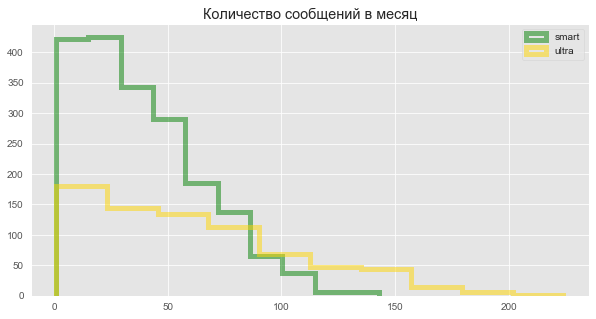

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
# построим стандартную гистограмму распределения количества сообщений,
# так как последнее является дискретной величиной (счетно)
# определим гистограммы в ступенчатом более прозрачном виде с большей толщиной линий; увеличим размер диаграмм
users_data.query('tariff=="smart"')['messages_amount'].hist(color='green',label='smart', alpha=0.5,
                                                            ax=ax, histtype='step', lw=5)
users_data.query('tariff=="ultra"')['messages_amount'].hist(color='gold', label='ultra', alpha=0.5,
                                                            ax=ax, histtype='step', lw=5)
# отображение легенды диаграммы
plt.legend()
# определим заголовок гистограммы
plt.title('Количество сообщений в месяц')
plt.show()

- значительная часть абонентов тарифа "Смарт" отправляют менее 40 сообщений в месяц.
- абоненты тарифа "Ультра" в течение месяца отправляют больше текстовых сообщений по сравнению с абонентами тарифа "Смарт", что отражено тяжелым правым хвостом распределения для абонентов тарифа "Ультра".

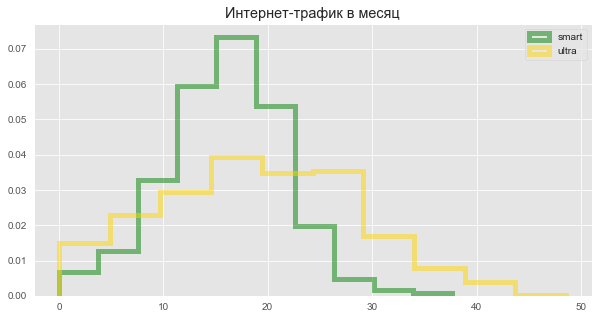

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
# построим плотностную гистограмму распределения количества интернета,
# так как последнее является непрерывной величиной
# определим гистограммы в ступенчатом более прозрачном виде с большей толщиной линий; увеличим размер диаграмм
users_data.query('tariff=="smart"')['gb_used'].hist(color='green',label='smart', alpha=0.5, density=True,
                                                            ax=ax, histtype='step', lw=5)
users_data.query('tariff=="ultra"')['gb_used'].hist(color='gold', label='ultra', alpha=0.5, density=True,
                                                            ax=ax, histtype='step', lw=5)
# отображение легенды диаграммы
plt.legend()
# определим заголовок гистограммы
plt.title('Интернет-трафик в месяц')
plt.show()

- наибольшая концентрация использования интернет-трафика абонентами тарифа "Смарт" лежит в интервале от 15-ти до 18-ти Гб в месяц. Тем самым вероятность того, что абоненты тарифа "Смарт" будут использовать интернет-трафик в интервале от 15-ти до 18-ти Гб составляет 21%, так как 0.07 * (18-15) = 0.21.
- наибольшая концентрация использования интернет-трафика абонентами тарифа "Ультра" лежит в интервале от 15-ти до 19-ти Гб, чуть меньшая концентрация наблюдается в интервале от 20-ти до 29-ти Гб. Тем самым вероятность того, что абоненты тарифа "Ультра" будут использовать интернет-трафик в интервале от 15-ти до 19-ти Гб в месяц составляет 16%, т.е. 0.04 * (19-15)=0.16.
- наименьшая концентрация использования интернет-трафика в месяц абонентами обоих тарифов "Смарт" и "Ультра" лежит в интервале от 35 Гб и выше (наблюдается толстый правый хвост плотности распределения интернет-трафика для абонентов обоих тарифов).

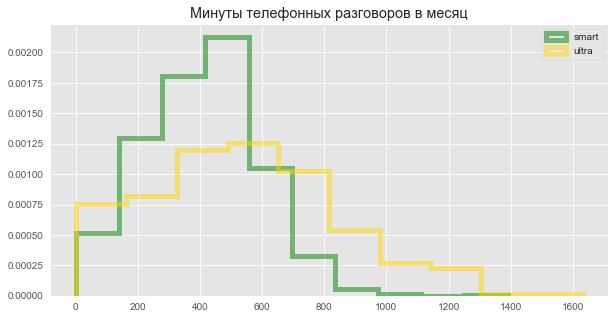

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
# построим плотностную гистограмму распределения количества минут разговоро,
# так как последнее является непрерывной величиной
# определим гистограммы в ступенчатом более прозрачном виде с большей толщиной линий; увеличим размер диаграмм
users_data.query('tariff=="smart"')['calls_duration'].hist(color='green',label='smart', alpha=0.5, density=True,
                                                            ax=ax, histtype='step', lw=5)
users_data.query('tariff=="ultra"')['calls_duration'].hist(color='gold', label='ultra', alpha=0.5, density=True,
                                                            ax=ax, histtype='step', lw=5)
# отображение легенды диаграммы
plt.legend()
# определим заголовок гистограммы
plt.title('Минуты телефонных разговоров в месяц')
plt.show()

- наибольшая концентрация минут телефонных разговоров абонентами тарифа "Смарт" лежит в интервале от 400 до 580 минут. Тем самым, вероятность того, что абоненты тарифа "Смарт" будут разговаривать по телефону от 400 до 580 минут приблизительно составляет 36%, т.к. (580-400) * 0.002 = 180 * 0.002 = 0.18 * 2 = 0.36.
- наибольшая концентрация минут телефонных разговоров абонентами тарифа "Ультра" лежит в интервале от 500 до 620 минут. Тем самым, вероятность того, что абоненты тарифа "Ультра" будут разговаривать по телефону от 500 до 620 минут в месяц составляет 15%, т.к. (620-500) * 0.00125 = 120 * 0.00125 = 1.2 * 0.125 = 0.15.
- наименьшая концентрация минут телефонных разговоров абонентами обоих тарифов "Смарт" и "Ультра" наблюдается в интервале от 1000 минут и выше.

### Промежуточные выводы 3-го шага исследования

#### Абоненты тарифа "Смарт" (в месяц):
- в среднем расходуют приблизительно 409 минут, с отклонением от средней величины в размере 182 минут 
- в среднем отправляют 39 сообщений, с отклонением от средней вличины в размере 26 сообщений
- в среднем расходуют 15.87 Гб интернета, с отклонением от средней величины в размере 5.65 Гб интернета
- в большинстве случаем отправляют менее 40 сообщений.
- наибольшая концентрация использования интернет-трафика данными абонентами лежит в интервале от 15-ти до 18-ти Гб.

*Тем самым, для клиентов тарифа "Смарт" в месяц необходимо 409 минут телефонных переговоров, 39 сообщений и 16 Гб интернета.*

#### Абоненты тарифа "Ультра" (в месяц):
- в среднем расходуют приблизительно 540 минут, с отклонением от средней величины в размере 302 минут
- в среднем отправляют 62 сообщения, с отклонением от средней величины в размере 45 сообщений
- в среднем расходуют 19.14 Гб интернета с отклонением от средней величины в размере 9.4 Гб интернета
- в течение месяца отправляют больше текстовых сообщений по сравнению с абонентами тарифа "Смарт", что отражено тяжелым правым хвостом распределения для абонентов тарифа "Ультра".
- наибольшая концентрация использования интернет-трафика данными абонентами лежит в интервале от 15-ти до 19-ти Гб, чуть меньшая концентрация наблюдается в интервале от 20-ти до 29-ти Гб.

*Тем самым, для клиентов тарифа "Ультра" в месяц необходимо 540 минут телефонных переговоров, 63 сообщения, чуть более 19 Гб интернета.*

### Шаг 4. Проверьте гипотезы

Постановка задачи на данном шаге исследования:

(а) Проверить следующие гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

(б) Пояснить:
- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

Пороговое значение alpha задать самостоятельно.

Перейдем к проверке первой гипотезы: *средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;*.

Так как предстоит проверить **наличие** разницы между средними величинами двух категорий абонентов, то нулевая гипотеза будет предполагать **отсутствие** разницы между данными категориями абонентов, т.е. исследуемые параметры (в частности средние величины выручки от абонентов "Смарт" и "Ультра") равны. Исходя из нулевой гипотезы, альтернативная гипотеза, напротив, будет предполагать *наличие* разницы (тем самым альтернативная гипотеза является двухсторонней).

Таким образом, нулевая и альтернативные гипотезы имеют следующий вид:
- *Нулевая гипотеза*
$H_{0}:$ средняя выручка пользователей тарифов "Смарт" и "Ультра" **не различается**.
- *Альтернативная гипотеза*
$H_{1}:$ средняя выручка пользователей тарифов "Смарт" и "Ультра" **различается.**

In [58]:
# здесь и далее укажем критический уровень статистической значимости альфа (alpha) в размере 5-ти процентов, т.е.:
alpha = 0.05

In [59]:
# выделим подвыборку ultra, которая содержит информацию о клиентах тарифа "Ультра"
ultra = users_data.query('tariff == "ultra"')
# выдели подвыборку smart, которая содежит информациб о клиентах тарифа "Смарт"
smart = users_data.query('tariff == "smart"')

In [60]:
# определим сводную таблицу, которая отражает
# (а) дисперсии ежемесячной выручки от клиентов двух тарифов "Смарт" и "Ультра",
# (б) размерности подвыборок клиентов тарифов "Смарт" и "Ультра"
users_data.pivot_table(index='tariff', values='monthly_revenue', aggfunc=['var','count'])

,var,count
,monthly_revenue,monthly_revenue
tariff,,
smart,609925.603313,1915
ultra,98653.644783,752


- Подвыборка из клиентов тарифа "Смарт" составляет 1915 наблюдений.
- Подвыборка из клиентов тарифа "Ультра" составляет 752 наблюдения.
- Дисперсия ежемесячной выручки от клиентов тарифа "Смарт" (609925) значительно превышает дисперсию ежемесячной выручки от клиентов тарифа "Ультра" (98653).

Таким образом в методе .ttest_ind обозначим разность дисперсий ежемесячной выручки от клиентов двух тарифов "Смарт" и "Ультра".

In [61]:
# применим метод scipy.stats.ttest_ind() для проверки гипотезы о равенстве средних величин
# в отношении выручки от абонентов двух тарифов "Смарт" и "Ультра".
# Ранее было выявлено расхождение кол-ва наблюдений и 
# величины дисперсий ежемесячной выручки между клиентами двух тарифов "Смарт" и "Ультра"
# тем самым, в аргументе equal_var укажем False, т.е. наличие разнородной дисперсии
results_tariff = st.ttest_ind(
    smart['monthly_revenue'],
    ultra['monthly_revenue'],
    equal_var=False
)

- метод .ttest_1samp() в нашем случае не подойдет, так как перед нами не ставилась задача равенства исследуемого параметра **из одной группы** определенной величиной. Напротив, пытаемся исследовать равенство параметров для наблюдений из **двух групп** (в частности абонентов двух тарифов "Смарт" и ""Ультра).
- метод .ttest_rel() в нашем случае не подойдет, так как перед нами не ставилась задача определения равности исследуемых параметров *до* и *после* определенного эксперимента.

In [62]:
# вывод р-значения
print('p-значение составляет:',results_tariff.pvalue)
# если р-значение меньше критического уровня статистической значимости
if (results_tariff.pvalue < alpha):
    print('Отвергаем нулевую гипотезу о равенстве ежемесячной выручки от клиентов двух тарифов "Смарт" и "Ультра" ')
# если, напротив, р-значение больше критического уровня статистической значимости
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение составляет: 3.8709531762016586e-263
Отвергаем нулевую гипотезу о равенстве ежемесячной выручки от клиентов двух тарифов "Смарт" и "Ультра" 


Перейдем к проверке второй гипотезы: *средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;*.

Так как предстоит проверить **наличие** разницы между средними величинами двух категорий абонентов: (а) из Москвы, (б) из других регионов, то нулевая гипотеза будет предполагать **отсутствие** разницы между данными категориями абонентов, т.е. исследуемые параметры (в частности средние величины выручки от абонентов: (а) из Москвы, (б) из других регионов) равны. Исходя из нулевой гипотезы, альтернативная гипотеза, напротив, будет предполагать *наличие* разницы (тем самым, альтернативная гипотеза является двухсторонней).

Таким образом, нулевая и альтернативные гипотезы имеют следующий вид:
- Нулевая гипотеза
$H_{0}:$ средняя выручка пользователей из Москвы **не отличается** от выручки пользователей из других регионов
- Альтернативная гипотеза
$H_{0}:$ средняя выручка пользователей из Москвы **отличается** от выручки пользователей из других регионов

In [63]:
# выделим подвыборку клиентов из Москвы
Moscow = users_data.query('city == "Москва" ')
# выделим подвыборку клиентов не из Москвы, т.е. из других регионов
NotMoscow = users_data.query('city != "Москва" ')

In [64]:
# проверим есть ли абоненты, месторасположение которых "Москва" указано через нижний регистр
users_data.loc[users_data['city']=='москва']

,user_id,month,sum_mb_used,calls_amount,calls_duration,messages_amount,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used,excess_calls_revenue,excess_internet_revenue,excess_messages_revenue,monthly_revenue


Видим, что нет наблюдений для которых месторасположение "Москва" указано через нижний регистр.

In [65]:
# определим числовые характеристики ежемесячной выручки от абонентов, месторасположение которых является Москва
print('Числовые характеристики ежемесячной выручки от абонентов, находящихся в Москве:')
print(Moscow['monthly_revenue'].describe())
# определим дисперсию ежемесячной выручки от абонентов, месторасположение которых является Москва
print()
print('Дисперсия ежемесячной выручки от абонентов, находящихся в Москве составляет: {:.2f}'.format(Moscow['monthly_revenue'].var() ))

Числовые характеристики ежемесячной выручки от абонентов, находящихся в Москве:
count     491.000000
mean     1506.208491
std       753.871808
min       550.000000
25%       711.660156
50%      1728.330078
75%      1950.000000
max      5081.930547
Name: monthly_revenue, dtype: float64

Дисперсия ежемесячной выручки от абонентов, находящихся в Москве составляет: 568322.70


In [66]:
# определим числовые характеристики ежемесячной выручки от абонентов из других регионов помимо Москвы
print('Числовые характеристики ежемесячной выручки от абонентов, находящихся в других регионах помимо Москвы:')
print(NotMoscow['monthly_revenue'].describe())
# определим дисперсию ежемесячной выручки от абонентов из других регионов помимо Москвы
print()
print('Дисперсия ежемесячной выручки от абонентов из других регионов помимо Москвы составляет: {:.2f}'.format(NotMoscow['monthly_revenue'].var() ))

Числовые характеристики ежемесячной выручки от абонентов, находящихся в других регионах помимо Москвы:
count    2176.000000
mean     1433.746875
std       781.809817
min       550.000000
25%       652.804785
50%      1416.538594
75%      1950.000000
max      6600.195703
Name: monthly_revenue, dtype: float64

Дисперсия ежемесячной выручки от абонентов из других регионов помимо Москвы составляет: 611226.59


- подвыборка абонентов из Москвы включает 491 наблюдение
- подвыборка абонентов из других регионов составляет 2176 наблюдений
- дисперсия ежемесячной выручки от клиентов из других регионов (611226.59) превышает дисперсию ежемесячной выручки от клиентов из Москвы (568322.70).

In [67]:
# применим метод scipy.stats.ttest_ind() для проверки гипотезы о равенстве средних значений
# ежемесячной выручки от абонентов двух месторасположений: "Москва" и "другие регионы помимо Москвы".
# Ранее было выявлено наличие различного количества наблюдений и различных величин дисперсии
# ежемесячной выручки от абонентов из Москвы и абонентов из других регионов помимо Москвы,
# тем самым, в аргументе equal_var укажем False, т.е. наличие разнородной дисперсии
results_location = st.ttest_ind(
    Moscow['monthly_revenue'],
    NotMoscow['monthly_revenue'],
    equal_var=False
)

- метод .ttest_1samp() в нашем случае не подойдет, так как перед нами не ставилась задача равенства исследуемого параметра **из одной группы** определенной величиной. Напротив, пытаемся исследовать равенство параметров для наблюдений из **двух групп** (в частности, абонентов из двух географических месторасположений "Москва" и "другие регионы").
- метод .ttest_rel() в нашем случае не подойдет, так как перед нами не ставилась задача определения равности исследуемых параметров *до* и *после* определенного эксперимента.

In [68]:
# вывод р-значения
print('p-значение составляет:',results_location.pvalue)
# если р-значение меньше критического уровня статистической значимости
if (results_location.pvalue < alpha):
    print('Отвергаем нулевую гипотезу о равенстве ежемесячной выручки от клиентов из Москвы и других регионов ')
# если, напротив, р-значение больше критического уровня статистической значимости
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение составляет: 0.05643742369382551
Не получилось отвергнуть нулевую гипотезу


### Промежуточные выводы 4-го шага исследования

#### В контексте двух видов тарифов "Смарт" и "Ультра" определили нулевую и альтерантивную гипотезы, а именно:
- *Нулевая гипотеза*
$H_{0}:$ средняя выручка пользователей тарифов "Смарт" и "Ультра" **не различается**.
- *Альтернативная гипотеза*
$H_{1}:$ средняя выручка пользователей тарифов "Смарт" и "Ультра" **различается.**

Также выявлено следующее:
- Подвыборка из клиентов тарифа "Смарт" составляет 1915 наблюдений.
- Подвыборка из клиентов тарифа "Ультра" составляет 752 наблюдения.
- Дисперсия ежемесячной выручки от клиентов тарифа "Смарт" (609925) значительно превышает дисперсию ежемесячной выручки от клиентов тарифа "Ультра" (98653).

Так как перед нами стоит задача проверки гипотезы о равенстве исследуемых параметров из двух групп, использовали метод .ttest_ind(), при условии расхождения дисперсий исследуемых величин из двух групп. В результате статистических вычислений **отвергаем нулевую гипотезу о равенстве средней выручки в месяц от абонентов двух тарифов "Смарт" и "Ультра" в пользу альтернативной гипотезы: средняя выручка в месяц между абонентами тарифа "Смарт" и абонентами тарифа "Ультра" статистически значимо отличается на 5-ти процентном уровне**.
    
#### В контексте  двух географических месторасположений "Москва" и "другие регионы", определили нулевую и альтернативную гипотезы, а именно:
- Нулевая гипотеза
$H_{0}:$ средняя выручка пользователей из Москвы **не отличается** от выручки пользователей из других регионов
- Альтернативная гипотеза
$H_{0}:$ средняя выручка пользователей из Москвы **отличается** от выручки пользователей из других регионов

Также выявлено следующее:
- подвыборка абонентов из Москвы включает 491 наблюдение
- подвыборка абонентов из других регионов составляет 2176 наблюдений
- дисперсия ежемесячной выручки от клиентов из других регионов (611226.59) превышает дисперсию ежемесячной выручки от клиентов из Москвы (568322.70).

Аналогично, так как перед нами стоит задача проверки гипотезы о равенстве исследуемых параметров из двух групп, использовали метод .ttest_ind(), при условии расхождения дисперсий исследуемых величин из двух групп. В результате статистических вычислений, **не получилось отвергнуть нулевую гипотезу о равенстве средней выручки в месяц от абонентов из двух месторасположений "Москва" и "другие регионы": средняя выручка в месяц между абонентами из Москвы и абонентами из других регионов не отличается на 5-ти процентном уровне значимости**.

### Шаг 5. Общие выводы

(а) в контексте общей информации об абонентах "Мегалайн" имеем 500 наблюдений, из которых 351 абонент с тарифом "Смарт", 149 абонент - тариф "Ультра".

(б) абоненты тарифа "Смарт":
- в среднем расходуют приблизительно 409 минут, с отклонением от средней величины в размере 182 минут 
- в среднем отправляют 39 сообщений, с отклонением от средней вличины в размере 26 сообщений
- в среднем расходуют 15.87 Гб интернета, с отклонением от средней величины в размере 5.65 Гб интернета
- в большинстве случаем отправляют менее 40 сообщений.
- наибольшая концентрация использования интернет-трафика данными абонентами лежит в интервале от 15-ти до 18-ти Гб.

(в) абоненты тарифа "Ультра" (в месяц):
- в среднем расходуют приблизительно 540 минут, с отклонением от средней величины в размере 302 минут
- в среднем отправляют 62 сообщения, с отклонением от средней величины в размере 45 сообщений
- в среднем расходуют 19.14 Гб интернета с отклонением от средней величины в размере 9.4 Гб интернета
- в течение месяца отправляют больше текстовых сообщений по сравнению с абонентами тарифа "Смарт", что отражено тяжелым правым хвостом распределения для абонентов тарифа "Ультра".
- наибольшая концентрация использования интернет-трафика данными абонентами лежит в интервале от 15-ти до 19-ти Гб, чуть меньшая концентрация наблюдается в интервале от 20-ти до 29-ти Гб.

(г) дисперсия ежемесячной выручки от клиентов тарифа "Смарт" (609925) значительно превышает дисперсию ежемесячной выручки от клиентов тарифа "Ультра" (98653).

(д) дисперсия ежемесячной выручки от клиентов из других регионов (611226.59) превышает дисперсию ежемесячной выручки от клиентов из Москвы (568322.70).

(е) отвергаем нулевую гипотезу о равенстве средней выручки в месяц от абонентов двух тарифов "Смарт" и "Ультра" в пользу альтернативной гипотезы: средняя выручка в месяц между абонентами тарифа "Смарт" и абонентами тарифа "Ультра" статистически значимо отличается на 5-ти процентном уровне.

(ж) не получилось отвергнуть нулевую гипотезу о равенстве средней выручки в месяц от абонентов из двух месторасположений "Москва" и "другие регионы": средняя выручка в месяц между абонентами из Москвы и абонентами из других регионов не отличается на 5-ти процентном уровне значимости.